In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Importing housing prices data
housing_prices_data = pd.read_csv('Resources/housing_prices.csv')
housing_prices_data.head()


,Date,Area,Composite_HPI,Two_Storey_HPI,Apartment_HPI,Composite_Benchmark,Two_Storey_Benchmark,Apartment_Benchmark
0,Jan 2005,Barrie_and_District,100.0,100.0,100.0,209000.0,220600.0,166400.0
1,Feb 2005,Barrie_and_District,101.5,101.2,100.3,212100.0,223200.0,166900.0
2,Mar 2005,Barrie_and_District,102.8,102.9,100.6,214800.0,227000.0,167400.0
3,Apr 2005,Barrie_and_District,103.5,103.4,100.9,216300.0,228100.0,167900.0
4,May 2005,Barrie_and_District,104.5,104.0,101.2,218400.0,229400.0,168400.0


In [3]:
# Determining how many rows in data set
housing_prices_data.shape

(1124, 8)

In [4]:
# Dropping n/a values from data set
housing_prices_data = housing_prices_data.dropna()

# Re-determining how many rows in data set
housing_prices_data.shape

(1110, 8)

In [5]:
# Splitting the Date column into Month and Year columns
housing_prices_data[['Month','Year']] = housing_prices_data.Date.str.split(" ", expand=True)

In [6]:
# Creating a housing prices data frame for analysis
housing_prices = housing_prices_data[['Area','Year','Month','Composite_Benchmark','Two_Storey_Benchmark','Apartment_Benchmark', "Date"]]

# Rename the columns for clarity
housing_prices = housing_prices.rename(columns = {"Area" : "Region",
                                               "Composite_Benchmark" : "Benchmark Price (Composite)",
                                               "Two_Storey_Benchmark" : "Benchmark Price (Two-Storey)",
                                               "Apartment_Benchmark" : "Benchmark Price (Apartment)"})

# Renaming Regions in df
housing_prices['Region'] = housing_prices['Region'].replace({'Barrie_and_District': 'Barrie', 'Niagara_Region': 'Niagara', 
                                                            'Hamilton_Burlington': 'Hamilton & Burlington', 
                                                             'Greater_Toronto': 'Greater Toronto',
                                                            'Oakville_Milton':'Oakville & Milton'})

# Export file as a CSV, without the Pandas index, but with the header
housing_prices.to_csv("Output/Housing_Prices.csv", index=False, header=True)

# Formatting data frame
housing_prices.style.format({'Benchmark Price (Composite)':'${:,.2f}',
                                    'Benchmark Price (Two-Storey)':'${:,.2f}',
                                    'Benchmark Price (Apartment)':'${:,.2f}'})



,Region,Year,Month,Benchmark Price (Composite),Benchmark Price (Two-Storey),Benchmark Price (Apartment),Date
0,Barrie,2005,Jan,"$209,000.00","$220,600.00","$166,400.00",Jan 2005
1,Barrie,2005,Feb,"$212,100.00","$223,200.00","$166,900.00",Feb 2005
2,Barrie,2005,Mar,"$214,800.00","$227,000.00","$167,400.00",Mar 2005
3,Barrie,2005,Apr,"$216,300.00","$228,100.00","$167,900.00",Apr 2005
4,Barrie,2005,May,"$218,400.00","$229,400.00","$168,400.00",May 2005
5,Barrie,2005,Jun,"$218,200.00","$229,600.00","$168,900.00",Jun 2005
6,Barrie,2005,Jul,"$220,500.00","$233,800.00","$167,400.00",Jul 2005
7,Barrie,2005,Aug,"$221,300.00","$232,300.00","$166,000.00",Aug 2005
8,Barrie,2005,Sep,"$223,200.00","$236,300.00","$164,700.00",Sep 2005
9,Barrie,2005,Oct,"$224,000.00","$234,500.00","$169,400.00",Oct 2005


In [7]:
# Grouping the housing prices by Region and Year and calculating the mean house prices
group_region_year = round(housing_prices.groupby(['Region','Year']).mean(),2)
group_region_year


Benchmark Price (Composite)  \
Region            Year                                
Barrie            2005                    219216.67   
                  2006                    231550.00   
                  2007                    242291.67   
                  2008                    251083.33   
                  2009                    249108.33   
...                                             ...   
Oakville & Milton 2016                    861641.67   
                  2017                   1005183.33   
                  2018                    980391.67   
                  2019                   1013375.00   
                  2020                   1087300.00   

                        Benchmark Price (Two-Storey)  \
Region            Year                                 
Barrie            2005                     230575.00   
                  2006                     243466.67   
                  2007                     253441.67   
                  2008                     262891.67   
                  2009                     260575.00   
...                                              ...   
Oakville & Milton 2016                     908275.00   
                  2017                    1055475.00   
                  2018                    1023475.00   
                  2019                    1060550.00   
                  2020                    1142680.00   

                        Benchmark Price (Apartment)  
Region            Year                               
Barrie            2005                    168883.33  
                  2006                    179375.00  
                  2007                    188266.67  
                  2008                    197891.67  
                  2009                    194591.67  
...                                             ...  
Oakville & Milton 2016                    424600.00  
                  2017                    502708.33  
                  2018                    521750.00  
                  2019                    544275.00  
                  2020                    569280.00  

[96 rows x 3 columns]

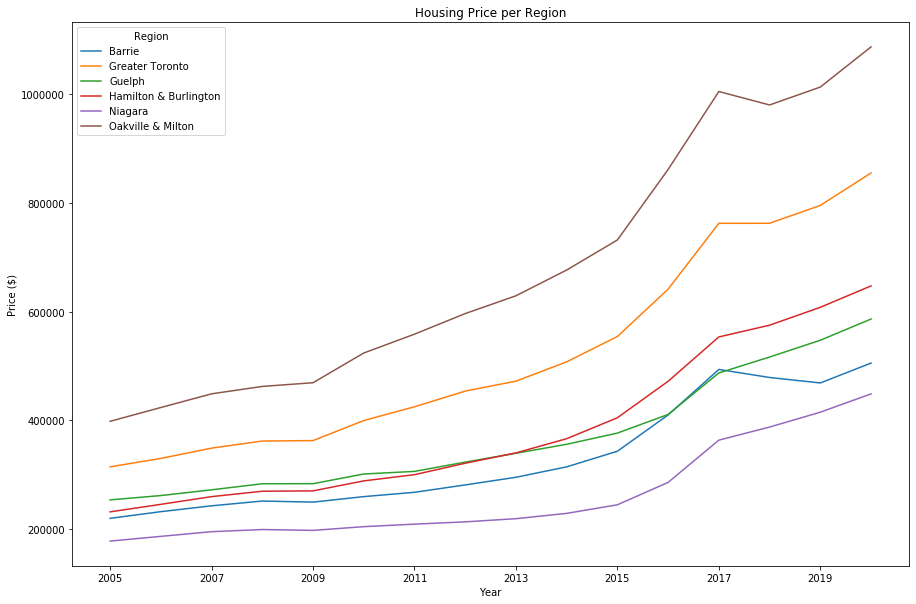

In [8]:
# Selecting composite price group to plot
group_comp = group_region_year['Benchmark Price (Composite)']

# Unstacking df and plotting on a line plot
group_comp.unstack(level='Region').plot.line(figsize=(15,10), subplots=False)

# Adding labels to chart
plt.title('Housing Price per Region')
plt.ylabel('Price ($)')

# Saving and displaying plot
plt.savefig('Images/Housing Price per Region.png')
plt.show()

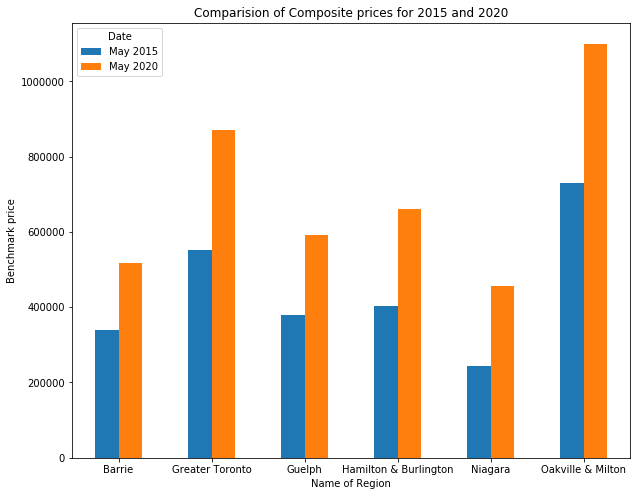

In [9]:
# Get the data to compare the price of the building during May 2015 and May 2020
housingPrice_2005_2020 = housing_prices.loc[((housing_prices["Date"] == "May 2015") | (housing_prices["Date"] == "May 2020"))]
housingPrice_2005_2020 = housingPrice_2005_2020[["Date", "Region", "Benchmark Price (Composite)"]]

# Return reshaped organized DataFrame 
housingPrice_pivot = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= "Benchmark Price (Composite)" )
housingPrice_pivot.plot(kind = "bar", rot = 0, figsize = (10, 8))
plt.xlabel("Name of Region")
plt.ylabel("Benchmark price")
plt.title("Comparision of Composite prices for 2015 and 2020")

plt.savefig("Images/composite prices for 2015 & 2020.png")
plt.show()


# Observation
Above bar chart shows the price increase in housing prices over a 5 year period: May 2020 vs May 2015. We observe significant price increases across all regions.

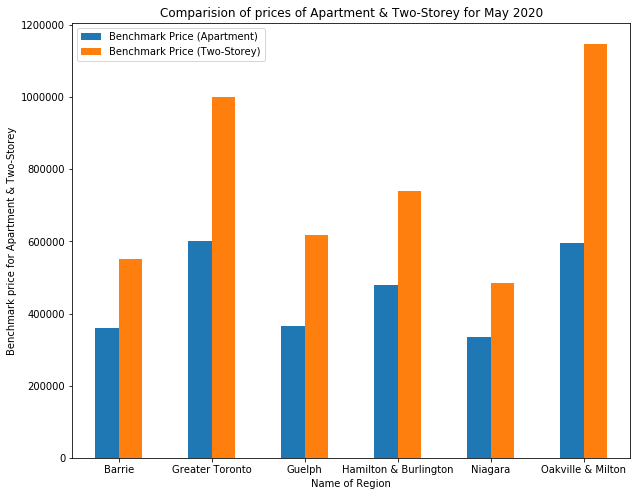

In [10]:
# Get the data for May 2020
housingPrice_2005_2020 = housing_prices.loc[(housing_prices["Date"] == "May 2020")]

# Return reshaped organized DataFrame
new = housingPrice_2005_2020.pivot(index= "Region", columns= "Date", values= ["Benchmark Price (Apartment)", "Benchmark Price (Two-Storey)"])
new.columns = new.columns.get_level_values(0)
new.plot(kind = "bar", rot = 0, figsize = (10, 8))
plt.xlabel("Name of Region")
plt.ylabel("Benchmark price for Apartment & Two-Storey")
plt.title("Comparision of prices of Apartment & Two-Storey for May 2020")

plt.savefig("Images/Price comparison apartment vs two-storey.png")
plt.show()


# Observation
From the above chart, we see that the price of apartment is always cheaper than the two-storey building in any region.

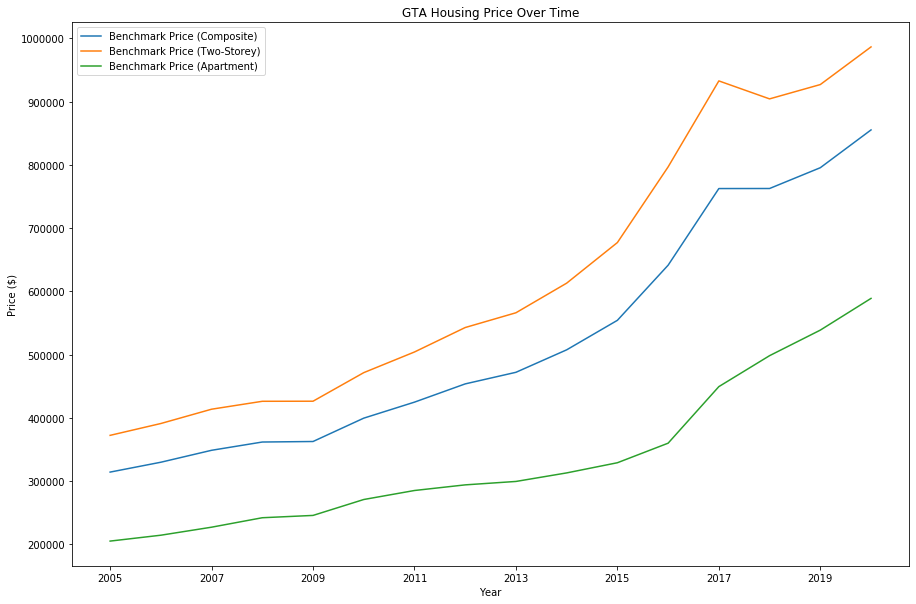

In [11]:
# Removing Region from index and adding to a column in df
group_gta = group_region_year.reset_index(level='Region')

# Isolating for only the GTA region
group_gta = group_gta.loc[group_gta['Region']== 'Greater Toronto']

# Plotting GTA housing prices over time
group_gta.plot.line(figsize=(15,10), subplots=False)

# Adding labels to chart
plt.title('GTA Housing Price Over Time')
plt.ylabel('Price ($)')

# Saving and displaying plot
plt.savefig('Images/GTA Housing Price Over Time.png')
plt.show()

# Observation

In the GTA, the gap between 2-storey and apartment prices increased since 2009.


In [12]:
# Importing income per region data
income_region_data = pd.read_csv('Resources/income_comparison.csv')
# Dropping all rows with missing data
income_region_data = income_region_data.dropna()

# Converting Date to String from float, and avg income to float
income_region_data['Year'] = income_region_data['Year'].astype(str)
income_region_data['Avg_Income'] = income_region_data['Avg_Income'].astype(float)

# Rename the columns for clarity
income_region_data = income_region_data.rename(columns = {'Description':'Region', 'Avg_Income':'Average Income'})

# Creating a housing prices data frame for analysis
income_region = income_region_data[['Region','Year','Average Income']]

# Renaming Regions in df to match housing price analysis and remiving 0's from end of year
income_region['Region'] = income_region['Region'].replace({'Hamilton':'Hamilton & Burlington', 'Toronto':'Greater Toronto'})
income_region['Year'] = income_region['Year'].replace({'2010.0':'2010', '2014.0':'2014','2017.0':'2017'})

# Export file as a CSV, without the Pandas index, but with the header
income_region.to_csv("Output/Income_Region.csv", index=False, header=True)

# Formatting data frame
income_region.style.format({'Average Income':'${:,.2f}'})

,Region,Year,Average Income
0,Greater Toronto,2017,"$52,547.00"
1,Hamilton & Burlington,2017,"$51,849.00"
2,Niagara,2017,"$43,645.00"
3,Guelph,2017,"$54,240.00"
4,Barrie,2017,"$48,123.00"
5,Greater Toronto,2014,"$48,543.00"
6,Hamilton & Burlington,2014,"$48,183.00"
7,Niagara,2014,"$40,770.00"
8,Guelph,2014,"$49,894.00"
9,Barrie,2014,"$45,056.00"


In [13]:
# Removing Year from group_region_year (housing analysis) index and adding to a column in df
group_region_year = group_region_year.reset_index(level=['Year'])

# Combine the housing_region data and income_region data into a single dataset
housing_income_region_data =pd.merge(group_region_year, income_region, on='Region')
housing_income_region_data

,Region,Year_x,Benchmark Price (Composite),Benchmark Price (Two-Storey),Benchmark Price (Apartment),Year_y,Average Income
0,Barrie,2005,219216.67,230575.00,168883.33,2017,48123.0
1,Barrie,2005,219216.67,230575.00,168883.33,2014,45056.0
2,Barrie,2005,219216.67,230575.00,168883.33,2010,40975.0
3,Barrie,2006,231550.00,243466.67,179375.00,2017,48123.0
4,Barrie,2006,231550.00,243466.67,179375.00,2014,45056.0
...,...,...,...,...,...,...,...
235,Niagara,2019,414708.33,436816.67,309166.67,2014,40770.0
236,Niagara,2019,414708.33,436816.67,309166.67,2010,37403.0
237,Niagara,2020,448380.00,472960.00,322200.00,2017,43645.0
238,Niagara,2020,448380.00,472960.00,322200.00,2014,40770.0


In [14]:
# Creating a clean df by removing any years where we dont have income data for
housing_income_region_clean = housing_income_region_data.loc[housing_income_region_data['Year_x'] == housing_income_region_data['Year_y']]

# Creating a df for analysis
housing_income_region = housing_income_region_clean[['Region', 'Year_x', 'Average Income', 'Benchmark Price (Composite)',
                                                      'Benchmark Price (Two-Storey)', 'Benchmark Price (Apartment)']]

# Rename the Year column and resetting index
housing_income_region = housing_income_region.rename(columns = {'Year_x':'Year'}).reset_index(drop=True)

# Export file as a CSV, without the Pandas index, but with the header
housing_income_region.to_csv("Output/Housing_Income_Region.csv", index=False, header=True)
housing_income_region

,Region,Year,Average Income,Benchmark Price (Composite),Benchmark Price (Two-Storey),Benchmark Price (Apartment)
0,Barrie,2010,40975.0,259250.00,271241.67,198525.00
1,Barrie,2014,45056.0,314025.00,330991.67,213858.33
2,Barrie,2017,48123.0,493375.00,528750.00,317800.00
3,Greater Toronto,2010,44478.0,399341.67,471316.67,270666.67
4,Greater Toronto,2014,48543.0,507391.67,612850.00,312733.33
5,Greater Toronto,2017,52547.0,762475.00,932725.00,449208.33
6,Guelph,2010,44915.0,300900.00,317908.33,177900.00
7,Guelph,2014,49894.0,355600.00,378433.33,210158.33
8,Guelph,2017,54240.0,486908.33,525316.67,272958.33
9,Hamilton & Burlington,2010,43388.0,288200.00,316100.00,202275.00


In [15]:
# Calculating housing price vs income ratio
housing_income_region['House Price/Income Ratio'] = housing_income_region['Benchmark Price (Composite)'] / housing_income_region['Average Income']

# Select the columns that we need to plot the chart
housing_income_region_ratio = housing_income_region[['Region', 'Year', 'House Price/Income Ratio']]
housing_income_region_ratio

,Region,Year,House Price/Income Ratio
0,Barrie,2010,6.327029
1,Barrie,2014,6.969660
2,Barrie,2017,10.252374
3,Greater Toronto,2010,8.978409
4,Greater Toronto,2014,10.452417
5,Greater Toronto,2017,14.510343
6,Guelph,2010,6.699321
7,Guelph,2014,7.127109
8,Guelph,2017,8.976923
9,Hamilton & Burlington,2010,6.642390


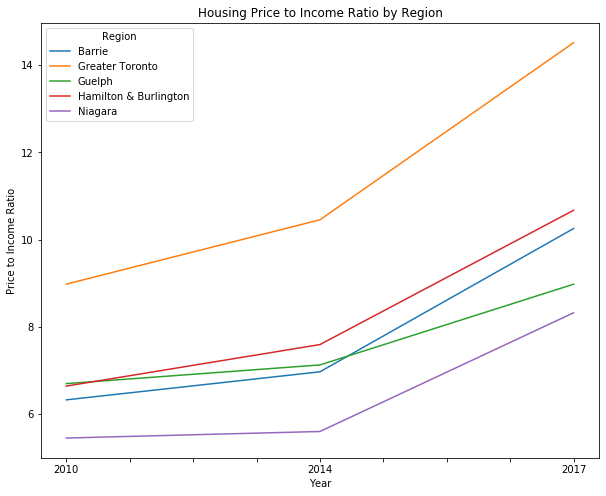

In [16]:
# Summarizing housing_income_region_ratio table with a pivot table
price_income_ratio = housing_income_region_ratio.pivot(index='Year', columns='Region', values='House Price/Income Ratio')
price_income_ratio.plot.line(figsize = (10, 8))

# Adding labels to chart
plt.title('Housing Price to Income Ratio by Region')
plt.ylabel('Price to Income Ratio')

# Saving and displaying plot
plt.savefig('Images/Price to Income Ratio.png')
plt.show()

# Observation

Housing affordability has decreased over time across all regions at different rates.

* The price of a house is 14.5 times more than the average income in 2017 in the GTA
* 4 times more as compared to three years before in 2014 (GTA)

Income growth has not been able to match the pace of house price increases. Across all six regions, we have observed the housing price to income ratio almost doubling between 2010 to 2017.



In [17]:
# Calculate the percent change of housing prices between May 2019, Jan 2019, Jan 2020 and May 2020
composite_may_2019 = housing_prices.loc[housing_prices["Date"] == "May 2019"]["Benchmark Price (Composite)"]
composite_jan_2019 = housing_prices.loc[housing_prices["Date"] == "Jan 2019"]["Benchmark Price (Composite)"]
composite_jan_2020 = housing_prices.loc[housing_prices["Date"] == "Jan 2020"]["Benchmark Price (Composite)"]
composite_may_2020 = housing_prices.loc[housing_prices["Date"] == "May 2020"]["Benchmark Price (Composite)"]

x = np.array(composite_may_2019, dtype = np.float)
y = np.array(composite_jan_2019, dtype = np.float)
a = np.array(composite_jan_2020, dtype = np.float)
b = np.array(composite_may_2020, dtype = np.float)

percent_change_2019 = (x/y - 1) * 100
percent_change_2020 = (b/a - 1) * 100

percent_change_2019 = percent_change_2019 .tolist()
percent_change_2020 = percent_change_2020.tolist()

region_name = housing_prices["Region"].unique()

# Create the DataFrame
percentChange_df = pd.DataFrame({"Region" : region_name,
                       "percent change 2019" : percent_change_2019, 
                       "percent change 2020" : percent_change_2020
                      })

percentChange_df = percentChange_df.set_index("Region")
percentChange_df


,percent change 2019,percent change 2020
Region,,
Barrie,-1.558164,6.015192
Greater Toronto,4.138834,5.047090
Guelph,4.502098,4.298045
Hamilton & Burlington,3.480796,4.763417
Niagara,3.709311,4.919540
Oakville & Milton,2.694217,4.921786


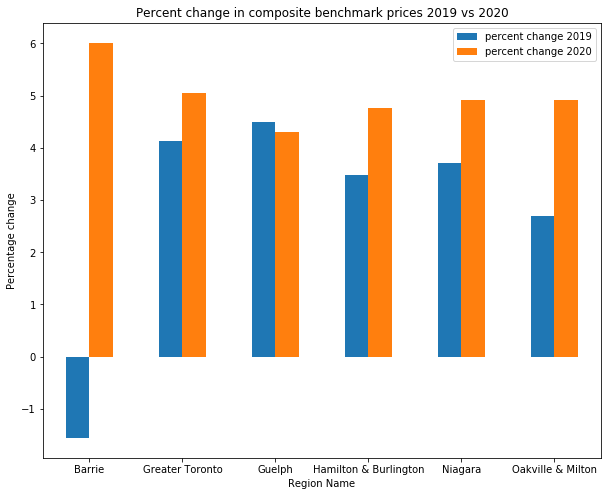

In [18]:
percentChange_df.plot(kind = "bar", rot = 0, figsize = (10, 8))
plt.xlabel("Region Name")
plt.ylabel("Percentage change")
plt.title("Percent change in composite benchmark prices 2019 vs 2020")
plt.savefig("Images/Percent change 2019 vs 2020.png")

# Observation
On 11th March, 2020, the WHO declared Covid -19 as pandemic. To analyse about the impact of Covid-19 on the housing prices, we are comparing the house prices from Jan-May 2019 vs 2020. The actual data is counterintuitive, as we see that the house prices have increased irrespective of the pandemic. Two possible reasons can help explain this anomaly. One, housing prices are sticky and we are not seeing a significant impact of Covid-19 on housing prices. The impact of covid would be more visible if we analyse the quantity of transactions. Also, our data lacks the real time data by 60 to 90 days (due to closing date which is typically 60 to 90 days after transaction).


# Conclusions:

* Housing prices are increasing, with occasional fluctuations due to the policy and regulatory changes across all regions.
 
* Housing prices have increased across all regions between 2015 and 2020. 
  * The GTA and the Oakville & Milton regions saw the largest increase in price and are the most expensive regions for any type of housing

* Housing affordability has decreased over time across all regions at different rates.
  * The price of a house is 14.5 times more than the average income in 2017 in the GTA
  * 4 times more as compared to three years before in 2014 (GTA)

* All regions have saw an increase in housing prices since the COVID-19 outbreak
  * Guelph saw a lower rate of increase in housing prices from January to May (2019 vs. 2020)
  * Delay in housing market changes due to closing time periods
